The steps demonstrated in this notebook are:

1. Loading the data
2. Familiarizing with data & EDA
3. Visualizing the data
4. Splitting the data
5. Training the data
6. Comparision of Model
7. Conclusion

In [1]:
import pandas as pd
import numpy as np

#Import Dataet

In [2]:
import os, types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
cos_client = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='kDmiq94im-mbLUTomIUujq_eHcRxZQd6yTccY7HkVgFq',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.private.us.cloud-object-storage.appdomain.cloud')

bucket = 'webphishingdetectionusingmachinel-donotdelete-pr-prbspk1gvdglqb'
object_key = 'dataset_website.csv'

body = cos_client.get_object(Bucket=bucket,Key=object_key)['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

ds = pd.read_csv(body)
ds.head()

,index,having_IPhaving_IP_Address,URLURL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,...,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
0,1,-1,1,1,1,-1,-1,-1,-1,-1,...,1,1,-1,-1,-1,-1,1,1,-1,-1
1,2,1,1,1,1,1,-1,0,1,-1,...,1,1,-1,-1,0,-1,1,1,1,-1
2,3,1,0,1,1,1,-1,-1,-1,-1,...,1,1,1,-1,1,-1,1,0,-1,-1
3,4,1,0,1,1,1,-1,-1,-1,1,...,1,1,-1,-1,1,-1,1,-1,1,-1
4,5,1,0,-1,1,1,-1,1,1,-1,...,-1,1,-1,-1,0,-1,1,1,1,1


In [3]:
ds

,index,having_IPhaving_IP_Address,URLURL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,...,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
0,1,-1,1,1,1,-1,-1,-1,-1,-1,...,1,1,-1,-1,-1,-1,1,1,-1,-1
1,2,1,1,1,1,1,-1,0,1,-1,...,1,1,-1,-1,0,-1,1,1,1,-1
2,3,1,0,1,1,1,-1,-1,-1,-1,...,1,1,1,-1,1,-1,1,0,-1,-1
3,4,1,0,1,1,1,-1,-1,-1,1,...,1,1,-1,-1,1,-1,1,-1,1,-1
4,5,1,0,-1,1,1,-1,1,1,-1,...,-1,1,-1,-1,0,-1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11050,11051,1,-1,1,-1,1,1,1,1,-1,...,-1,-1,1,1,-1,-1,1,1,1,1
11051,11052,-1,1,1,-1,-1,-1,1,-1,-1,...,-1,1,1,1,1,1,1,-1,1,-1
11052,11053,1,-1,1,1,1,-1,1,-1,-1,...,1,1,1,1,1,-1,1,0,1,-1
11053,11054,-1,-1,1,1,1,-1,-1,-1,1,...,-1,1,1,1,1,-1,1,1,1,-1


#Handling Null Values

In [4]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11055 entries, 0 to 11054
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   index                        11055 non-null  int64
 1   having_IPhaving_IP_Address   11055 non-null  int64
 2   URLURL_Length                11055 non-null  int64
 3   Shortining_Service           11055 non-null  int64
 4   having_At_Symbol             11055 non-null  int64
 5   double_slash_redirecting     11055 non-null  int64
 6   Prefix_Suffix                11055 non-null  int64
 7   having_Sub_Domain            11055 non-null  int64
 8   SSLfinal_State               11055 non-null  int64
 9   Domain_registeration_length  11055 non-null  int64
 10  Favicon                      11055 non-null  int64
 11  port                         11055 non-null  int64
 12  HTTPS_token                  11055 non-null  int64
 13  Request_URL                  11055 non-null  i

In [5]:
ds.describe()

,index,having_IPhaving_IP_Address,URLURL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,...,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
count,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,...,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000
mean,5528.000000,0.313795,-0.633198,0.738761,0.700588,0.741474,-0.734962,0.063953,0.250927,-0.336771,...,0.613388,0.816915,0.061239,0.377114,0.287291,-0.483673,0.721574,0.344007,0.719584,0.113885
std,3191.447947,0.949534,0.766095,0.673998,0.713598,0.671011,0.678139,0.817518,0.911892,0.941629,...,0.789818,0.576784,0.998168,0.926209,0.827733,0.875289,0.692369,0.569944,0.694437,0.993539
min,1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,2764.500000,-1.000000,-1.000000,1.000000,1.000000,1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,1.000000,1.000000,-1.000000,-1.000000,0.000000,-1.000000,1.000000,0.000000,1.000000,-1.000000
50%,5528.000000,1.000000,-1.000000,1.000000,1.000000,1.000000,-1.000000,0.000000,1.000000,-1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,-1.000000,1.000000,0.000000,1.000000,1.000000
75%,8291.500000,1.000000,-1.000000,1.000000,1.000000,1.000000,-1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,11055.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [6]:
ds.isnull()

,index,having_IPhaving_IP_Address,URLURL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,...,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11050,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
11051,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
11052,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
11053,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


#Splitting data into independent and dependent variables

In [7]:
x=ds.iloc[:,1:31].values
y=ds.iloc[:,31:32].values

In [8]:
x.shape

(11055, 30)

In [9]:
y.shape

(11055, 1)

In [10]:
print(x,y)

[[-1  1  1 ...  1  1 -1]
 [ 1  1  1 ...  1  1  1]
 [ 1  0  1 ...  1  0 -1]
 ...
 [ 1 -1  1 ...  1  0  1]
 [-1 -1  1 ...  1  1  1]
 [-1 -1  1 ... -1  1 -1]] [[-1]
 [-1]
 [-1]
 ...
 [-1]
 [-1]
 [-1]]


#Splitting the data train and test

In [11]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [12]:
x_train.shape

(8844, 30)

In [13]:
x_test.shape

(2211, 30)

In [14]:
#Working with Logistic Regression model
from sklearn.linear_model import LogisticRegression
log = LogisticRegression()


In [15]:
log.fit(x_train,y_train)

/opt/conda/envs/Python-3.9/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [16]:
y_pred_lr = log.predict(x_test)
y_pred_lr

array([-1, -1,  1, ..., -1, -1,  1])

In [17]:
y_test

array([[-1],
       [-1],
       [-1],
       ...,
       [ 1],
       [ 1],
       [ 1]])

In [18]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred_lr)

0.9167797376752601

In [19]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred_lr)
cm

array([[ 905,  109],
       [  75, 1122]])

In [20]:
import sklearn.metrics as metrics
fpr,tpr,threshold = metrics.roc_curve(y_test,y_pred_lr)
roc_curve = metrics.auc(fpr,tpr)

In [21]:
fpr

array([0.        , 0.10749507, 1.        ])

In [22]:
tpr

array([0.        , 0.93734336, 1.        ])

In [23]:
import matplotlib.pyplot as plt

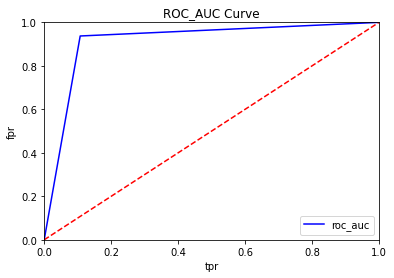

In [24]:
plt.title("ROC_AUC Curve")
plt.plot(fpr,tpr,'b',label='roc_auc')
plt.plot([0,1],[0,1],'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.xlabel('tpr')
plt.ylabel('fpr')
plt.legend(loc="lower right")

In [25]:
pwd

'/home/wsuser/work'

In [26]:
!pip install ibm_watson_machine_learning

In [27]:
from ibm_watson_machine_learning import APIClient
import json
import numpy as np

In [28]:

credentials = {
                  "apikey" : "KGdexk84M3lJ5NjGjTHB7Djxli0JxuQPQed0dUdNoMZa",
                  "url" : "https://us-south.ml.cloud.ibm.com"
                  
                 }

client = APIClient(credentials)
client.spaces.list()

Note: 'limit' is not provided. Only first 50 records will be displayed if the number of records exceed 50
------------------------------------  ------  ------------------------
ID                                    NAME    CREATED
845ccf22-ab49-4188-abcc-8a6e3dc807d6  models  2022-10-29T16:02:31.694Z
------------------------------------  ------  ------------------------


In [29]:
client = APIClient(credentials)
client.spaces.list()

Note: 'limit' is not provided. Only first 50 records will be displayed if the number of records exceed 50
------------------------------------  ------  ------------------------
ID                                    NAME    CREATED
845ccf22-ab49-4188-abcc-8a6e3dc807d6  models  2022-10-29T16:02:31.694Z
------------------------------------  ------  ------------------------


In [30]:
def guid_from_space_name(client, space_name):
    space = client.spaces.get_details()
    #print(space)
    return(next(item for item in space['resources']if item['entity']["name"] == space_name)['metadata']['id'])

In [31]:
space_uid = guid_from_space_name(client, 'models')
print("Space UID = " + space_uid)

Space UID = 845ccf22-ab49-4188-abcc-8a6e3dc807d6


In [32]:
client.set.default_space(space_uid)

'SUCCESS'

In [33]:
client.software_specifications.list()

-----------------------------  ------------------------------------  ----
NAME                           ASSET_ID                              TYPE
default_py3.6                  0062b8c9-8b7d-44a0-a9b9-46c416adcbd9  base
kernel-spark3.2-scala2.12      020d69ce-7ac1-5e68-ac1a-31189867356a  base
pytorch-onnx_1.3-py3.7-edt     069ea134-3346-5748-b513-49120e15d288  base
scikit-learn_0.20-py3.6        09c5a1d0-9c1e-4473-a344-eb7b665ff687  base
spark-mllib_3.0-scala_2.12     09f4cff0-90a7-5899-b9ed-1ef348aebdee  base
pytorch-onnx_rt22.1-py3.9      0b848dd4-e681-5599-be41-b5f6fccc6471  base
ai-function_0.1-py3.6          0cdb0f1e-5376-4f4d-92dd-da3b69aa9bda  base
shiny-r3.6                     0e6e79df-875e-4f24-8ae9-62dcc2148306  base
tensorflow_2.4-py3.7-horovod   1092590a-307d-563d-9b62-4eb7d64b3f22  base
pytorch_1.1-py3.6              10ac12d6-6b30-4ccd-8392-3e922c096a92  base
tensorflow_1.15-py3.6-ddl      111e41b3-de2d-5422-a4d6-bf776828c4b7  base
runtime-22.1-py3.9             12b83a1

In [34]:
#Save and deploy
import sklearn
sklearn.__version__

'1.0.2'

In [35]:
MODEL_NAME="Phishing_Website_Detection"
DEPLOYMENT_NAME="Phishing_Proj"
DEMO_MODEL=log

In [36]:
#Set Python Version
software_spec_uid = client.software_specifications.get_uid_by_name("runtime-22.1-py3.9")
software_spec_uid

'12b83a17-24d8-5082-900f-0ab31fbfd3cb'

In [37]:
#Setup model meta
model_props={
    client.repository.ModelMetaNames.NAME:MODEL_NAME,
    client.repository.ModelMetaNames.TYPE:'scikit-learn_1.0',
    client.repository.ModelMetaNames.SOFTWARE_SPEC_UID:software_spec_uid
}

In [38]:
#Save Model
model_details=client.repository.store_model(
    model=DEMO_MODEL,
    meta_props=model_props,
    training_data=x_train,
    training_target=y_train
)
model_details

{'entity': {'hybrid_pipeline_software_specs': [],
  'label_column': 'l0',
  'schemas': {'input': [{'fields': [{'name': 'f0', 'type': 'int'},
      {'name': 'f1', 'type': 'int'},
      {'name': 'f2', 'type': 'int'},
      {'name': 'f3', 'type': 'int'},
      {'name': 'f4', 'type': 'int'},
      {'name': 'f5', 'type': 'int'},
      {'name': 'f6', 'type': 'int'},
      {'name': 'f7', 'type': 'int'},
      {'name': 'f8', 'type': 'int'},
      {'name': 'f9', 'type': 'int'},
      {'name': 'f10', 'type': 'int'},
      {'name': 'f11', 'type': 'int'},
      {'name': 'f12', 'type': 'int'},
      {'name': 'f13', 'type': 'int'},
      {'name': 'f14', 'type': 'int'},
      {'name': 'f15', 'type': 'int'},
      {'name': 'f16', 'type': 'int'},
      {'name': 'f17', 'type': 'int'},
      {'name': 'f18', 'type': 'int'},
      {'name': 'f19', 'type': 'int'},
      {'name': 'f20', 'type': 'int'},
      {'name': 'f21', 'type': 'int'},
      {'name': 'f22', 'type': 'int'},
      {'name': 'f23', 'type': 'i

In [39]:
model_id=client.repository.get_model_id(model_details)
model_id

'62167a7b-9e3d-41ee-a8d4-2d7036291b48'

In [40]:
x_train[0]

array([ 1, -1,  1,  1,  1,  1, -1,  1, -1,  1,  1,  1,  1,  0, -1, -1,  1,
        1,  0,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1])

In [41]:
log.predict([[ 1, -1,  1,  1,  1,  1, -1,  1, -1,  1,  1,  1,  1,  0, -1, -1,  1,
        1,  0,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1]])

array([1])

In [42]:
#set data
deployment_props={
    client.deployments.ConfigurationMetaNames.NAME:DEPLOYMENT_NAME,
    client.deployments.ConfigurationMetaNames.ONLINE:{}
}

In [43]:
#deploy
deployment=client.deployments.create(
    artifact_uid=model_id,
    meta_props=deployment_props
)



#######################################################################################

Synchronous deployment creation for uid: '62167a7b-9e3d-41ee-a8d4-2d7036291b48' started

#######################################################################################


initializing
Note: online_url is deprecated and will be removed in a future release. Use serving_urls instead.

ready


------------------------------------------------------------------------------------------------
Successfully finished deployment creation, deployment_uid='9c61f122-0950-4f0a-8b9c-3c20c1dad421'
------------------------------------------------------------------------------------------------




In [44]:
import pickle 
pickle.dump(LogisticRegression, open('Phishing_Website.pkl','wb'))